In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 16
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [5]:
!wget https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Train.zip
!unzip CAX_Characters_Train.zip

--2019-06-19 18:13:54--  https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190442283 (182M) [application/zip]
Saving to: ‘CAX_Characters_Train.zip’

CAX_Characters_Trai 100%[===================>] 181.62M  90.5MB/s    in 2.0s    

2019-06-19 18:13:56 (90.5 MB/s) - ‘CAX_Characters_Train.zip’ saved [190442283/190442283]

Archive:  CAX_Characters_Train.zip
   creating: CAX_Characters_Train/
   creating: CAX_Characters_Train/angrybirds/
  inflating: CAX_Characters_Train/angrybirds/Cax_train1.jpg  
  inflating: CAX_Characters_Train/angrybirds/Cax_train10.jpg  
  inflating: CAX_Characters_Train/angrybirds/Cax_train100.jpg  
  inflating: CAX_Characters_Train/angrybirds/Cax_train101.jpg  
  inflating: CAX_Ch

In [0]:
path = Path('/content/')

In [7]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/data'),
 PosixPath('/content/models'),
 PosixPath('/content/CAX_Characters_Train'),
 PosixPath('/content/CAX_Characters_Train.zip')]

In [0]:
# ??get_transforms

In [0]:
tfms = get_transforms(do_flip=False,flip_vert = False,max_zoom=1.4,max_warp=0.0)
data = ImageDataBunch.from_folder(path,valid_pct = 0.20,train='CAX_Characters_Train', ds_tfms=tfms, size=300).normalize(imagenet_stats)
#data = ImageDataBunch.from_folder(path,valid_pct = 0.2,train='CAX_Characters_Train' size=320)

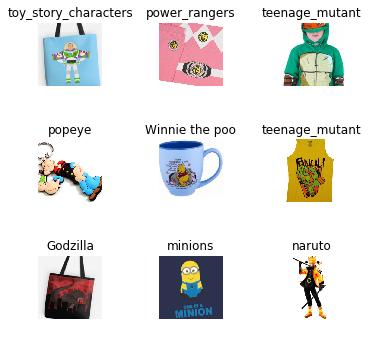

In [11]:
data.show_batch(rows=3, figsize=(5,5))

In [12]:
print(data.classes)
len(data.classes),data.c

['Baloo', 'Bart simpson', 'Charlie brown', 'Chicken_little', 'Cinderella', 'Godzilla', 'Goku_1', 'John Cena', 'R2-D2', 'Roman Reigns', 'Scoopy Doo', 'SpongeBob SquarePants', 'Tom and Jerry', 'Winnie the poo', 'angrybirds', 'ben', 'bulbasaur', 'charizard', 'charmander', 'darth_vader', 'disney_princes', 'donald_duck', 'goofy', 'han-solo', 'harry_potter', 'hellokitty', 'itachi', 'jojosiwa', 'kakashi', 'marilyn_monroe', 'mickey_mouse', 'minions', 'naruto', 'pikachu', 'pokemon', 'popeye', 'power_rangers', 'squirtle', 'teenage_mutant', 'toy_story_characters', 'vampirina', 'vegeta']


(42, 42)

In [0]:
np.random.seed(999)

In [0]:
learn1 = cnn_learner(data, models.resnet152, metrics=accuracy).to_fp16()
#learn.fit(2)

In [0]:
learn1.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time


In [0]:
#learn.save('stage_1_caxcomp')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

RuntimeError: ignored

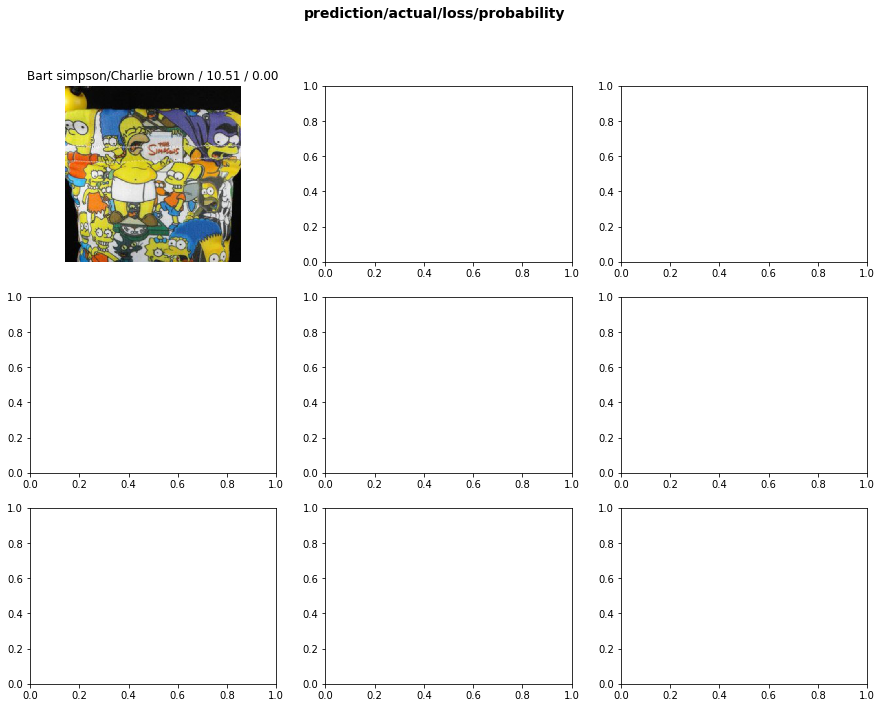

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

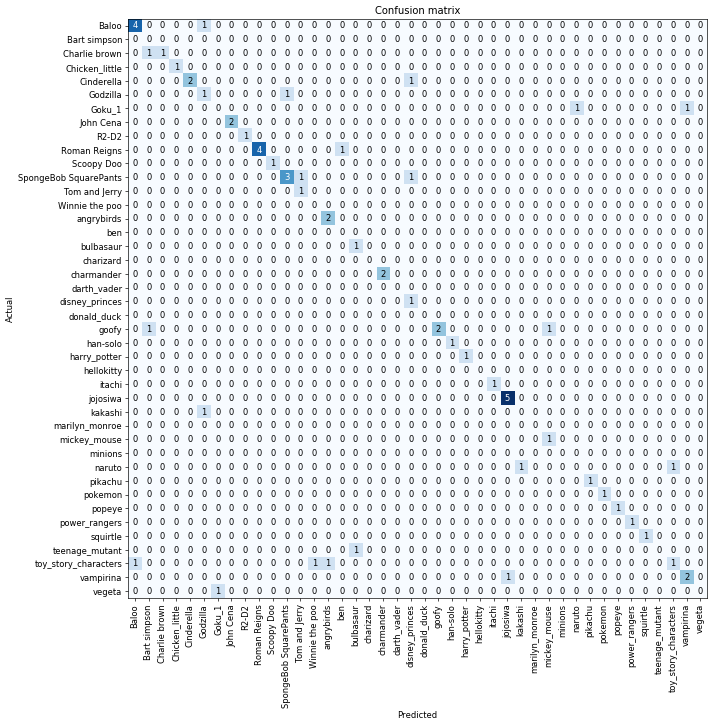

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[]

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


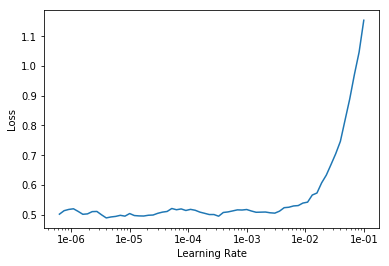

In [15]:
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(5e-5,5e-3))

RuntimeError: ignored

In [0]:
#learn.save('max_cc_88')

In [0]:
#learn.fit_one_cycle(3, max_lr=slice(3e-7,3e-4))

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

epoch	train_loss	valid_loss	accuracy	time
0	0.336410	0.927190	0.737550	01:56
1	0.375802	0.821575	0.774900	01:57
2	0.225349	0.664727	0.814741	01:59
3	0.126733	0.646136	0.823705	01:59

RuntimeError: ignored

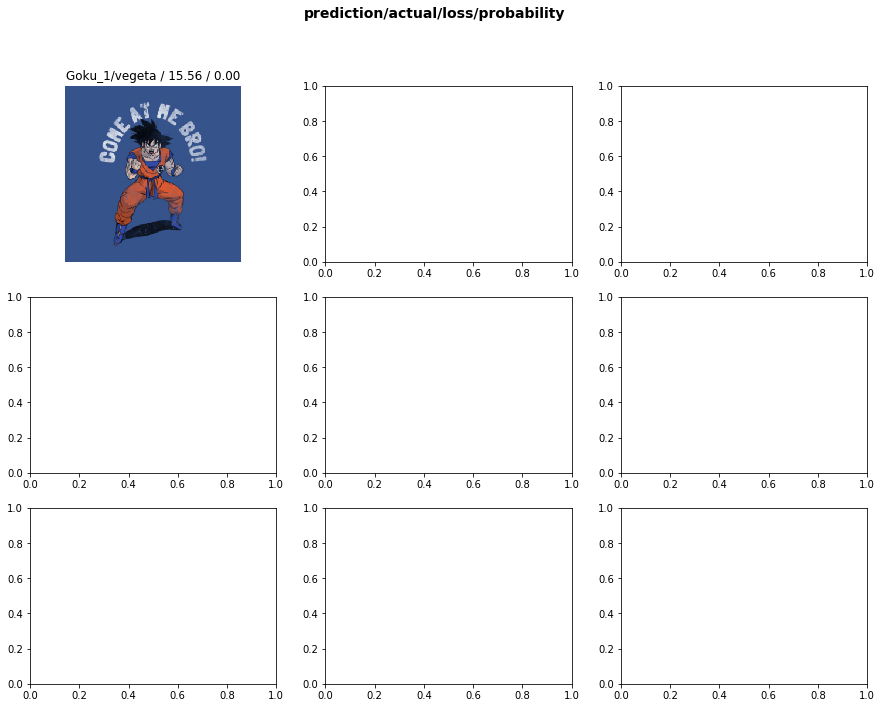

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=3)

In [0]:
!wget https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Test.zip
!unzip CAX_Characters_Test.zip

--2019-06-19 13:01:10--  https://storage.googleapis.com/cax-contests/propensity-modeling/CAX_Characters_Test.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.24.144, 2404:6800:4004:818::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.24.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100419963 (96M) [application/zip]
Saving to: ‘CAX_Characters_Test.zip’

CAX_Characters_Test 100%[===================>]  95.77M  53.9MB/s    in 1.8s    

2019-06-19 13:01:13 (53.9 MB/s) - ‘CAX_Characters_Test.zip’ saved [100419963/100419963]

Archive:  CAX_Characters_Test.zip
   creating: test_characters_new/
  inflating: test_characters_new/Cax_test1.jpg  
  inflating: test_characters_new/Cax_test10.jpg  
  inflating: test_characters_new/Cax_test100.jpg  
  inflating: test_characters_new/Cax_test1000.jpg  
  inflating: test_characters_new/Cax_test1001.jpg  
  inflating: test_characters_new/Cax_test1002.jpg  
  inflating: test_

In [0]:
ordered=True

In [0]:
test_imgs = (path/'test_characters_new/').ls()
#test_imgs.sort(key=lambda x: x.stem)
data.add_test(test_imgs) 
learn.data = data
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [0]:
lable_map = dict(zip(list(range(0,42)),data.classes))

In [0]:
a = []
for i in list((test_imgs)):
  a.append((str(i).split('/')[3]))

In [0]:
predictions = pd.DataFrame(data={'Filename':a,'lable':list(np.array(labels))})

In [0]:
predictions.head(1)

,Filename,lable
0,Cax_test2130.jpg,28


In [0]:
predictions['Prediction'] = predictions['lable'].map(lable_map)

In [0]:
fnl =  predictions[['Filename','Prediction']]

In [0]:
fnl.head(1)

,Filename,Prediction
0,Cax_test2130.jpg,kakashi


In [0]:
learn.save('semi_rortate50_train_v1')

In [0]:
from google.colab import files

fnl.to_csv('fnl_full23.csv',index = False)
files.download('fnl_full23.csv')

In [0]:
open_image(path/'test_characters_new/Cax_test2222.jpg')